In [1]:
import scipy.io as sio
import numpy as np
import pickle as pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from scipy import signal
import os
import math

In [2]:

from tensorflow.keras import Model 
from tensorflow.keras.utils import to_categorical 
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, Conv2D, MaxPooling2D, RepeatVector, GRU, GlobalAveragePooling2D
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
_,_, files = next(os.walk(r'D:\IIITA\DENS\Emotional'))
files_count = len(files)
files_count

494

In [4]:
# mapping = pd.read_csv('/content/drive/MyDrive/perexp_table_mapping.csv')

In [5]:
# scores = pd.read_csv('/content/drive/MyDrive/perexp_table_neopir.csv')

In [6]:
# mapping.head()

In [7]:
# scores.head()

In [8]:
# merge_scoresid = pd.DataFrame()

In [9]:
# merge_scoresid = pd.merge(mapping,scores,on = 'participant_id')

In [10]:
# mapping

In [11]:
# scores

In [12]:
# merge_scoresid

In [13]:
# files

In [14]:
df1 = pd.read_csv(r"C:\Users\Noman\Desktop\Anushka\AC_3clust_Labels_3.5v.csv")

In [15]:
df = df1.dropna()

In [16]:
# df

In [17]:
df2 = pd.read_excel(r"D:\IIITA\DENS\wholeFrequencyDependentDataWithVADLFR_ReFormattingWholeFrequencyVA.xlsx")

In [18]:
df2 = df2[df2['valence'] < 3.5]

In [19]:
# df2

In [20]:
df2['Patternn'] = df2['Subject'].str.split('_').str[1]
df2['Pattern'] = df2['Patternn'].str.split('T').str[0]
# Merge df1 and df2 based on the Pattern column
df_merged = pd.merge(df2, df, on='Pattern')

In [21]:
# df_merged

In [22]:
# df_merged.info()

In [23]:
eeg_data = []
eeg_label1 = []
eeg_label2 = []

In [24]:
base_path = r"D:\IIITA\DENS\Emotional\\"
for f in files:
  if f.endswith(".mat"):
    file_str = f[:-4]
    dff = df_merged[df_merged["Subject"].str.contains(file_str)]
    if not dff.empty:
      path = base_path + f
      mat = sio.loadmat(path)
      data = mat.get('eegData')
      eeg_data.append(data)
      dff = dff[['Subject','cluster_label','Pattern']]
      dff = dff.drop_duplicates()
      #valence = df['valence']
      #arousal = df['arousal']
      clust_lab = dff['cluster_label']
      lab = clust_lab.values[0]
      eeg_label1.append(lab)
      sub_lab = dff['Pattern']
      lab2 = sub_lab.values[0]
      eeg_label2.append(lab2)



In [25]:
eeg_data = np.array(eeg_data)

In [26]:
eeg_data.shape

(244, 128, 1751)

In [27]:
eeg_label1 = np.array(eeg_label1)
eeg_label2 = np.array(eeg_label2)

In [28]:
# len(np.unique(eeg_label2))

In [29]:
eeg_Label1 = []
for i in eeg_label1:
    for j in range (0,128):
        eeg_Label1.append(i)

In [30]:
type(eeg_label2[0])

numpy.str_

In [31]:
eeg_Label2 = []
for i in eeg_label2:
    parts = i.split('t')  # Split the string at 't'
    if len(parts) > 1:  # Check if there's a second part after splitting
        second_part = parts[1]  # Access the second part
        for j in range(0, 128):
            eeg_Label2.append(second_part)


In [32]:
# print(np.unique(eeg_Label2))


In [33]:
# print(len(np.unique(eeg_Label2)))


In [34]:
from keras.utils import to_categorical

# Assuming eeg_Label2 is your original label list
# eeg_Label2 = ['003', '004', '007', '014', '017', '022', '023', '032', '035', '040', '051', '054', '061', '067', '072', '076', '079', '080', '081', '082', '096', '097', '099', '104', '107', '111', '113', '114', '116', '117', '121', '122', '123']

# Map unique values to numbers from 1 to 33
label_map = {label: i for i, label in enumerate(sorted(set(eeg_Label2)))}

# Convert labels to mapped numbers
eeg_Label2_mapped = [label_map[label] for label in eeg_Label2]

# Check the mapped labels
print("Mapped labels:", eeg_Label2_mapped)

# Convert mapped labels to one-hot encoded format
num_classes = len(label_map)  # Number of unique mapped labels
y2 = to_categorical(eeg_Label2_mapped, num_classes=num_classes)
print("Number of classes:", num_classes)


Mapped labels: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [35]:
y1 = to_categorical(eeg_Label1)
# y2 = to_categorical(eeg_Label2)
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# y2 = mlb.fit_transform(eeg_Label2)

In [36]:
# f = "Baseline_mit040.mat"
# file_str = f[12:-4]
# file_str

In [37]:
# def label_mapping(neurovalue):
#   if(neurovalue > 68.8):
#     label = 1
#   else:
#     label = 0
#   return label

In [38]:
import functools
def combine_dims(a, i=0, n=1):
  s = list(a.shape)
  combined = functools.reduce(lambda x,y: x*y, s[i:i+n+1])
  return np.reshape(a, s[:i] + [combined] + s[i+n+1:])

In [39]:
eeg_Data = combine_dims(np.array(eeg_data), 0)

In [40]:
eeg_Data.shape

(31232, 1751)

In [41]:
fs = 250

size_dataset = len(eeg_Data)
nperseg = 125
noverlap = 62
f_size = math.ceil(((nperseg + 1)/2))
t_size = int((eeg_Data[0].size - noverlap ) / (nperseg - noverlap))
X_full = np.ndarray(shape=(size_dataset, f_size, t_size, 3))
for i in range(0, size_dataset):
  for j in range(0,3):
    X = eeg_Data[i]
    f, t, Sxx = spectrogram(X, fs, nperseg = nperseg, noverlap = noverlap, mode='psd')
    X_full[i, :, :, j] = Sxx

In [42]:
X_full = np.array(X_full)

In [43]:
X_full /= 255

In [44]:
input_shape = (X_full.shape[1],X_full.shape[2],X_full.shape[3])
input_shape

(63, 26, 3)

In [45]:
import keras

In [46]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, LSTM, Dense
from keras.models import Model

def build_Classifier():
    # Input layer for CNN
    input_shape = (63, 26, 3)
    input_cnn = Input(shape=input_shape, name="EEG_Features")

    # CNN layers
    x = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(input_cnn)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.1)(x)
    x = Flatten()(x)
    # x = RepeatVector(3)(x)
    # # # LSTM layers
    # x = LSTM(256, return_sequences=True)(x)
    # x = Dropout(0.2)(x)
    # x = LSTM(128)(x)
    # x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer for y1
    y1_output = Dense(3, activation='softmax', name='y1_output')(x)

    # Output layer for y2
    y2_output = Dense(33, activation='softmax', name='y2_output')(x)

    # Create model
    model = Model(inputs=input_cnn, outputs=[y1_output, y2_output])
    model.summary()

    # Compile model
    model.compile(optimizer='Adam',
                  loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True)], metrics=['accuracy'])
    return model
    # loss_weights=[0.8, 0.2]

In [47]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, StratifiedKFold, KFold, cross_validate, RepeatedKFold
kf = RepeatedKFold(n_splits=2,n_repeats=2, random_state = 42)

In [48]:
model = build_Classifier()
# model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 EEG_Features (InputLayer)      [(None, 63, 26, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 61, 24, 32)   896         ['EEG_Features[0][0]']           
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 12, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 10, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

In [49]:
accuracies = []
weighted_accuracies = []
f_scores = []

In [50]:
import tensorflow as tf

In [51]:

# # # for train_index, test_index in kf.split(X_full, y1, y2):
# # #     X_train, X_test = X_full[train_index], X_full[test_index]
# # #     y1_train, y1_test = y1[train_index], y1[test_index]
# # #     y2_train, y2_test = y2[train_index], y2[test_index]

# # #     model = build_Classifier()
# # #     es = tf.keras.callbacks.EarlyStopping(monitor='val_y1_output_loss', mode='min', verbose=1, patience=30)
# # #     mc = tf.keras.callbacks.ModelCheckpoint('VAD_WSW_24_model.h5', monitor='val_y1_output_accuracy', mode='max', verbose=1, save_best_only=True)
# # #     model.fit(X_train, [y1_train, y2_train], epochs=5, batch_size=256, verbose=1, validation_data=(X_test, [y1_test, y2_test]), callbacks=[es, mc])

# # #     saved_model = load_model('VAD_WSW_24_model.h5')
# # #     evaluation_results = saved_model.evaluate(X_test, [y1_test, y2_test], verbose=0)
# # #     loss = evaluation_results[0]
# # #     accuracies = evaluation_results[1:]

# # #     # Extracting accuracy values
# # #     weighted_test_acc1 = accuracies[0]
# # #     weighted_test_acc2 = accuracies[1]
# # #     weighted_accuracies.append((weighted_test_acc1 + weighted_test_acc2) / 2)  # Taking average of weighted accuracies for y1 and y2

# # #     y1_pred_saved, y2_pred_saved = saved_model.predict(X_test)
# # #     y1_test_argmax = np.argmax(y1_test, axis=1)
# # #     y2_test_argmax = np.argmax(y2_test, axis=1)
# # #     y1_pred_saved_argmax = np.argmax(y1_pred_saved, axis=1)
# # #     y2_pred_saved_argmax = np.argmax(y2_pred_saved, axis=1)
# # #     f_score1 = f1_score(y1_test_argmax, y1_pred_saved_argmax, average='weighted')
# # #     f_score2 = f1_score(y2_test_argmax, y2_pred_saved_argmax, average='weighted')
# # #     f_scores.append((f_score1 + f_score2) / 2)  # Taking average of F1 scores for y1 and y2


# # # Define lists to store metrics for each variable
# y1_accuracies = []
# y2_accuracies = []
# weighted_accuracies_y1 = []
# weighted_accuracies_y2 = []
# y1_f_scores = []
# y2_f_scores = []

# # # for train_index, test_index in kf.split(X_full, y1, y2):
# # #     X_train, X_test = X_full[train_index], X_full[test_index]
# # #     y1_train, y1_test = y1[train_index], y1[test_index]
# # #     y2_train, y2_test = y2[train_index], y2[test_index]

# # #     model = build_Classifier()
# # #     es = tf.keras.callbacks.EarlyStopping(monitor='val_y1_output_loss', mode='min', verbose=1, patience=30)
# # #     mc = tf.keras.callbacks.ModelCheckpoint('VAD_WSW_24_model.h5', monitor='val_y1_output_accuracy', mode='max', verbose=1, save_best_only=True)
# # #     model.fit(X_train, [y1_train, y2_train], epochs=5, batch_size=256, verbose=1, validation_data=(X_test, [y1_test, y2_test]), callbacks=[es, mc])

# # #     saved_model = load_model('VAD_WSW_24_model.h5')
# # #     evaluation_results = saved_model.evaluate(X_test, [y1_test, y2_test], verbose=0)
# # #     loss = evaluation_results[0]
# # #     accuracies = evaluation_results[1:]

# # #     # Extracting accuracy values for y1 and y2
# # #     y1_test_accuracy = accuracies[0]
# # #     y2_test_accuracy = accuracies[1]

# # #     # Storing accuracies for y1 and y2 separately
# # #     y1_accuracies.append(y1_test_accuracy)
# # #     y2_accuracies.append(y2_test_accuracy)

# # #     # Calculating weighted accuracies for y1 and y2
# # #     weighted_test_acc1 = y1_test_accuracy
# # #     weighted_test_acc2 = y2_test_accuracy
# # #     weighted_accuracies_y1.append(weighted_test_acc1)
# # #     weighted_accuracies_y2.append(weighted_test_acc2)

# # #     y1_pred_saved, y2_pred_saved = saved_model.predict(X_test)
# # #     y1_test_argmax = np.argmax(y1_test, axis=1)
# # #     y2_test_argmax = np.argmax(y2_test, axis=1)
# # #     y1_pred_saved_argmax = np.argmax(y1_pred_saved, axis=1)
# # #     y2_pred_saved_argmax = np.argmax(y2_pred_saved, axis=1)

# # #     # Calculating F1 scores for y1 and y2
# # #     f_score1 = f1_score(y1_test_argmax, y1_pred_saved_argmax, average='weighted')
# # #     f_score2 = f1_score(y2_test_argmax, y2_pred_saved_argmax, average='weighted')

# # #     # Storing F1 scores for y1 and y2 separately
# # #     y1_f_scores.append(f_score1)
# # #     y2_f_scores.append(f_score2)

# # Define lists to store metrics for each variable
# # y1_accuracies_train = []
# # y2_accuracies_train = []
# # y1_losses_train = []
# # y2_losses_train = []
# # y1_accuracies_test = []
# # y2_accuracies_test = []
# # y1_losses_test = []
# # y2_losses_test = []



# for train_index, test_index in kf.split(X_full, y1, y2):
#     X_train, X_test = X_full[train_index], X_full[test_index]
#     y1_train, y1_test = y1[train_index], y1[test_index]
#     y2_train, y2_test = y2[train_index], y2[test_index]

#     model = build_Classifier()
#     es = tf.keras.callbacks.EarlyStopping(monitor='val_y1_output_loss', mode='min', verbose=1, patience=30)
#     mc = tf.keras.callbacks.ModelCheckpoint('VAD_WSW_24_model.h5', monitor='val_y2_output_accuracy', mode='max', verbose=1, save_best_only=True)
#     model.fit(X_train, [y1_train, y2_train], epochs=5, batch_size=256, verbose=1, validation_data=(X_test, [y1_test, y2_test]), callbacks=[es, mc])

#     saved_model = load_model('VAD_WSW_24_model.h5')
#     evaluation_results = saved_model.evaluate(X_test, [y1_test, y2_test], verbose=0)
#     loss = evaluation_results[0]
#     accuracies = evaluation_results[1:]

#     # Extracting accuracy values for y1 and y2
#     y1_test_accuracy = accuracies[0]
#     y2_test_accuracy = accuracies[1]

#     # Storing accuracies for y1 and y2 separately
#     y1_accuracies.append(y1_test_accuracy)
#     y2_accuracies.append(y2_test_accuracy)

#     # Calculating weighted accuracies for y1 and y2
#     weighted_test_acc1 = y1_test_accuracy
#     weighted_test_acc2 = y2_test_accuracy
#     weighted_accuracies_y1.append(weighted_test_acc1)
#     weighted_accuracies_y2.append(weighted_test_acc2)

#     y1_pred_saved, y2_pred_saved = saved_model.predict(X_test)
#     y1_test_argmax = np.argmax(y1_test, axis=1)
#     y2_test_argmax = np.argmax(y2_test, axis=1)
#     y1_pred_saved_argmax = np.argmax(y1_pred_saved, axis=1)
#     y2_pred_saved_argmax = np.argmax(y2_pred_saved, axis=1)

#     # Calculating F1 scores for y1 and y2
#     f_score1 = f1_score(y1_test_argmax, y1_pred_saved_argmax, average='weighted')
#     f_score2 = f1_score(y2_test_argmax, y2_pred_saved_argmax, average='weighted')

#     # Storing F1 scores for y1 and y2 separately
#     y1_f_scores.append(f_score1)
#     y2_f_scores.append(f_score2)


# # Convert lists to NumPy arrays
# y1_accuracies = np.array(y1_accuracies)
# y2_accuracies = np.array(y2_accuracies)
# weighted_accuracies_y1 = np.array(weighted_accuracies_y1)
# weighted_accuracies_y2 = np.array(weighted_accuracies_y2)
# y1_f_scores = np.array(y1_f_scores)
# y2_f_scores = np.array(y2_f_scores)

# print("y1 Accuracy:", y1_accuracies)
# print("y1 Mean Accuracy:", np.mean(y1_accuracies))
# print("y1 Balanced Accuracy:", weighted_accuracies_y1)
# print("y1 Mean Balanced Accuracy:", np.mean(weighted_accuracies_y1))
# print("y1 F1 score:", y1_f_scores)
# print("y1 Mean F1 score:", np.mean(y1_f_scores))

# print("y2 Accuracy:", y2_accuracies)
# print("y2 Mean Accuracy:", np.mean(y2_accuracies))
# print("y2 Balanced Accuracy:", weighted_accuracies_y2)
# print("y2 Mean Balanced Accuracy:", np.mean(weighted_accuracies_y2))
# print("y2 F1 score:", y2_f_scores)
# print("y2 Mean F1 score:", np.mean(y2_f_scores))




In [52]:
# from keras.callbacks import History

# # Define lists to store metrics for each variable
# y1_accuracies_train = []
# y2_accuracies_train = []
# y1_losses_train = []
# y2_losses_train = []
# y1_accuracies_test = []
# y2_accuracies_test = []
# y1_losses_test = []
# y2_losses_test = []
from keras.callbacks import History
# Perform 80-20 train-test split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_full, y1, y2, test_size=0.2, random_state=42)

model = build_Classifier()

# Callback for storing training history
history = History()

es = tf.keras.callbacks.EarlyStopping(monitor='val_y1_output_loss', mode='min', verbose=1, patience=30)
mc = tf.keras.callbacks.ModelCheckpoint('VAD_WSW_24_model.h5', monitor='val_y1_output_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model
model.fit(X_train, [y1_train, y2_train], epochs=300, batch_size=256, verbose=1, validation_data=(X_test, [y1_test, y2_test]), callbacks=[es, mc, history])


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 EEG_Features (InputLayer)      [(None, 63, 26, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 61, 24, 32)   896         ['EEG_Features[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 12, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 10, 64)   18496       ['max_pooling2d_2[0][0]']        
                                                                                            

In [53]:
evaluation_results = model.evaluate(X_test, [y1_test, y2_test], verbose=0)

In [54]:
len(evaluation_results)

5

In [55]:
evaluation_results[4]

0.9705458879470825

In [56]:
evaluation_results = model.evaluate(X_test, [y1_test, y2_test], verbose=0)
print("Evaluation results shape:", len(evaluation_results))
print("Evaluation results contents:", evaluation_results)


Evaluation results shape: 5
Evaluation results contents: [0.2843039333820343, 0.10141818225383759, 0.18288573622703552, 0.9614214897155762, 0.9705458879470825]


In [57]:
# Print the test accuracy and loss for each label
print("Test Accuracy for y1:", evaluation_results[3])
print("Test Loss for y1:", evaluation_results[1])
print("Test Accuracy for y2:", evaluation_results[4])
print("Test Loss for y2:", evaluation_results[2])

Test Accuracy for y1: 0.9614214897155762
Test Loss for y1: 0.10141818225383759
Test Accuracy for y2: 0.9705458879470825
Test Loss for y2: 0.18288573622703552


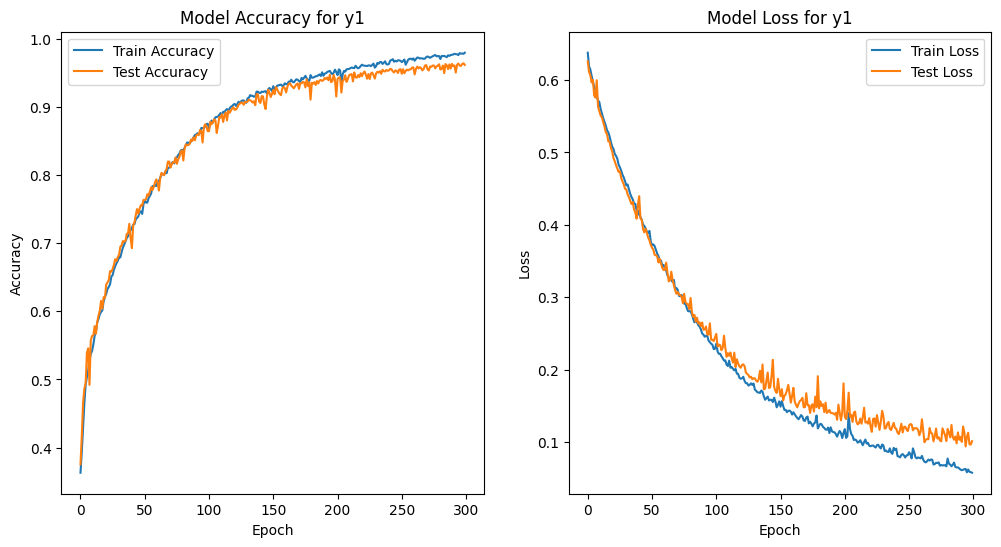

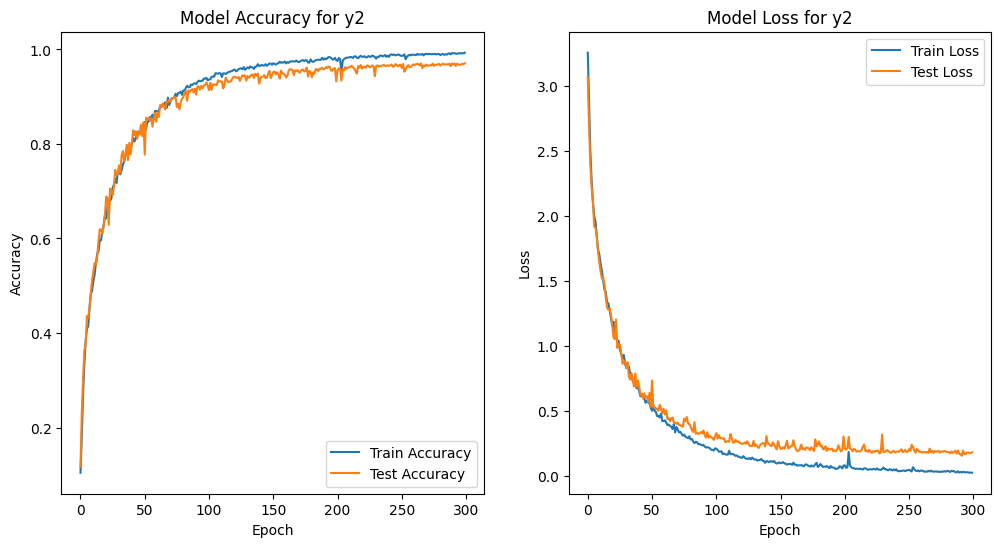

In [58]:

# Plotting accuracy and loss curves for y1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['y1_output_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_y1_output_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy for y1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['y1_output_loss'], label='Train Loss')
plt.plot(history.history['val_y1_output_loss'], label='Test Loss')
plt.title('Model Loss for y1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy and loss curves for y2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['y2_output_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_y2_output_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy for y2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['y2_output_loss'], label='Train Loss')
plt.plot(history.history['val_y2_output_loss'], label='Test Loss')
plt.title('Model Loss for y2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [59]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y1_pred, y2_pred = model.predict(X_test)

# Convert predictions to class labels
y1_pred_labels = np.argmax(y1_pred, axis=1)
y2_pred_labels = np.argmax(y2_pred, axis=1)
y1_true_labels = np.argmax(y1_test, axis=1)
y2_true_labels = np.argmax(y2_test, axis=1)

# Print classification report for y1
print("Classification Report for y1:")
print(classification_report(y1_true_labels, y1_pred_labels))

# Print classification report for y2
print("Classification Report for y2:")
print(classification_report(y2_true_labels, y2_pred_labels))


196/196 [==============================] - 1s 2ms/step
Classification Report for y1:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1815
           1       0.96      0.97      0.96      2366
           2       0.98      0.95      0.96      2066

    accuracy                           0.96      6247
   macro avg       0.96      0.96      0.96      6247
weighted avg       0.96      0.96      0.96      6247

Classification Report for y2:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.98      0.99      0.98        80
           2       1.00      0.95      0.98       128
           3       0.98      1.00      0.99        48
           4       0.99      1.00      1.00       163
           5       0.99      0.99      0.99       417
           6       0.94      0.96      0.95       144
           7       0.95      0.96      0.96       252
           8     

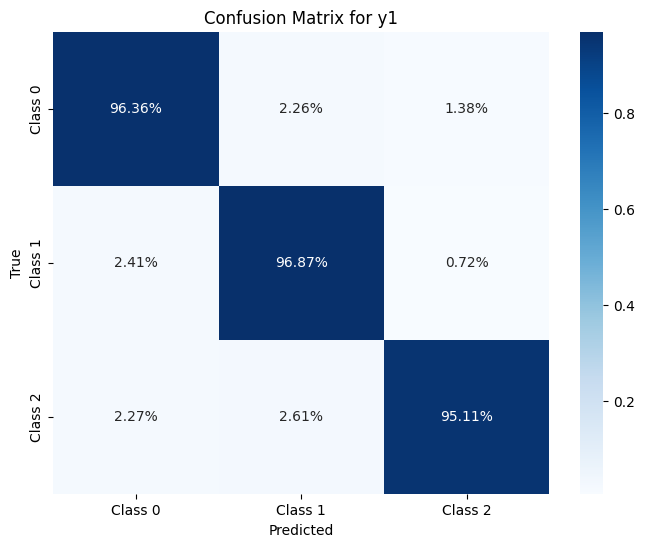

In [60]:
conf_matrix_y1 = confusion_matrix(y1_true_labels, y1_pred_labels)

# Compute confusion matrix for y2
conf_matrix_y2 = confusion_matrix(y2_true_labels, y2_pred_labels)

# Plot confusion matrix for y1
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_y1 / conf_matrix_y1.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues", xticklabels=[f"Class {i}" for i in range(y1_pred.shape[1])], yticklabels=[f"Class {i}" for i in range(y1_pred.shape[1])])
plt.title("Confusion Matrix for y1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



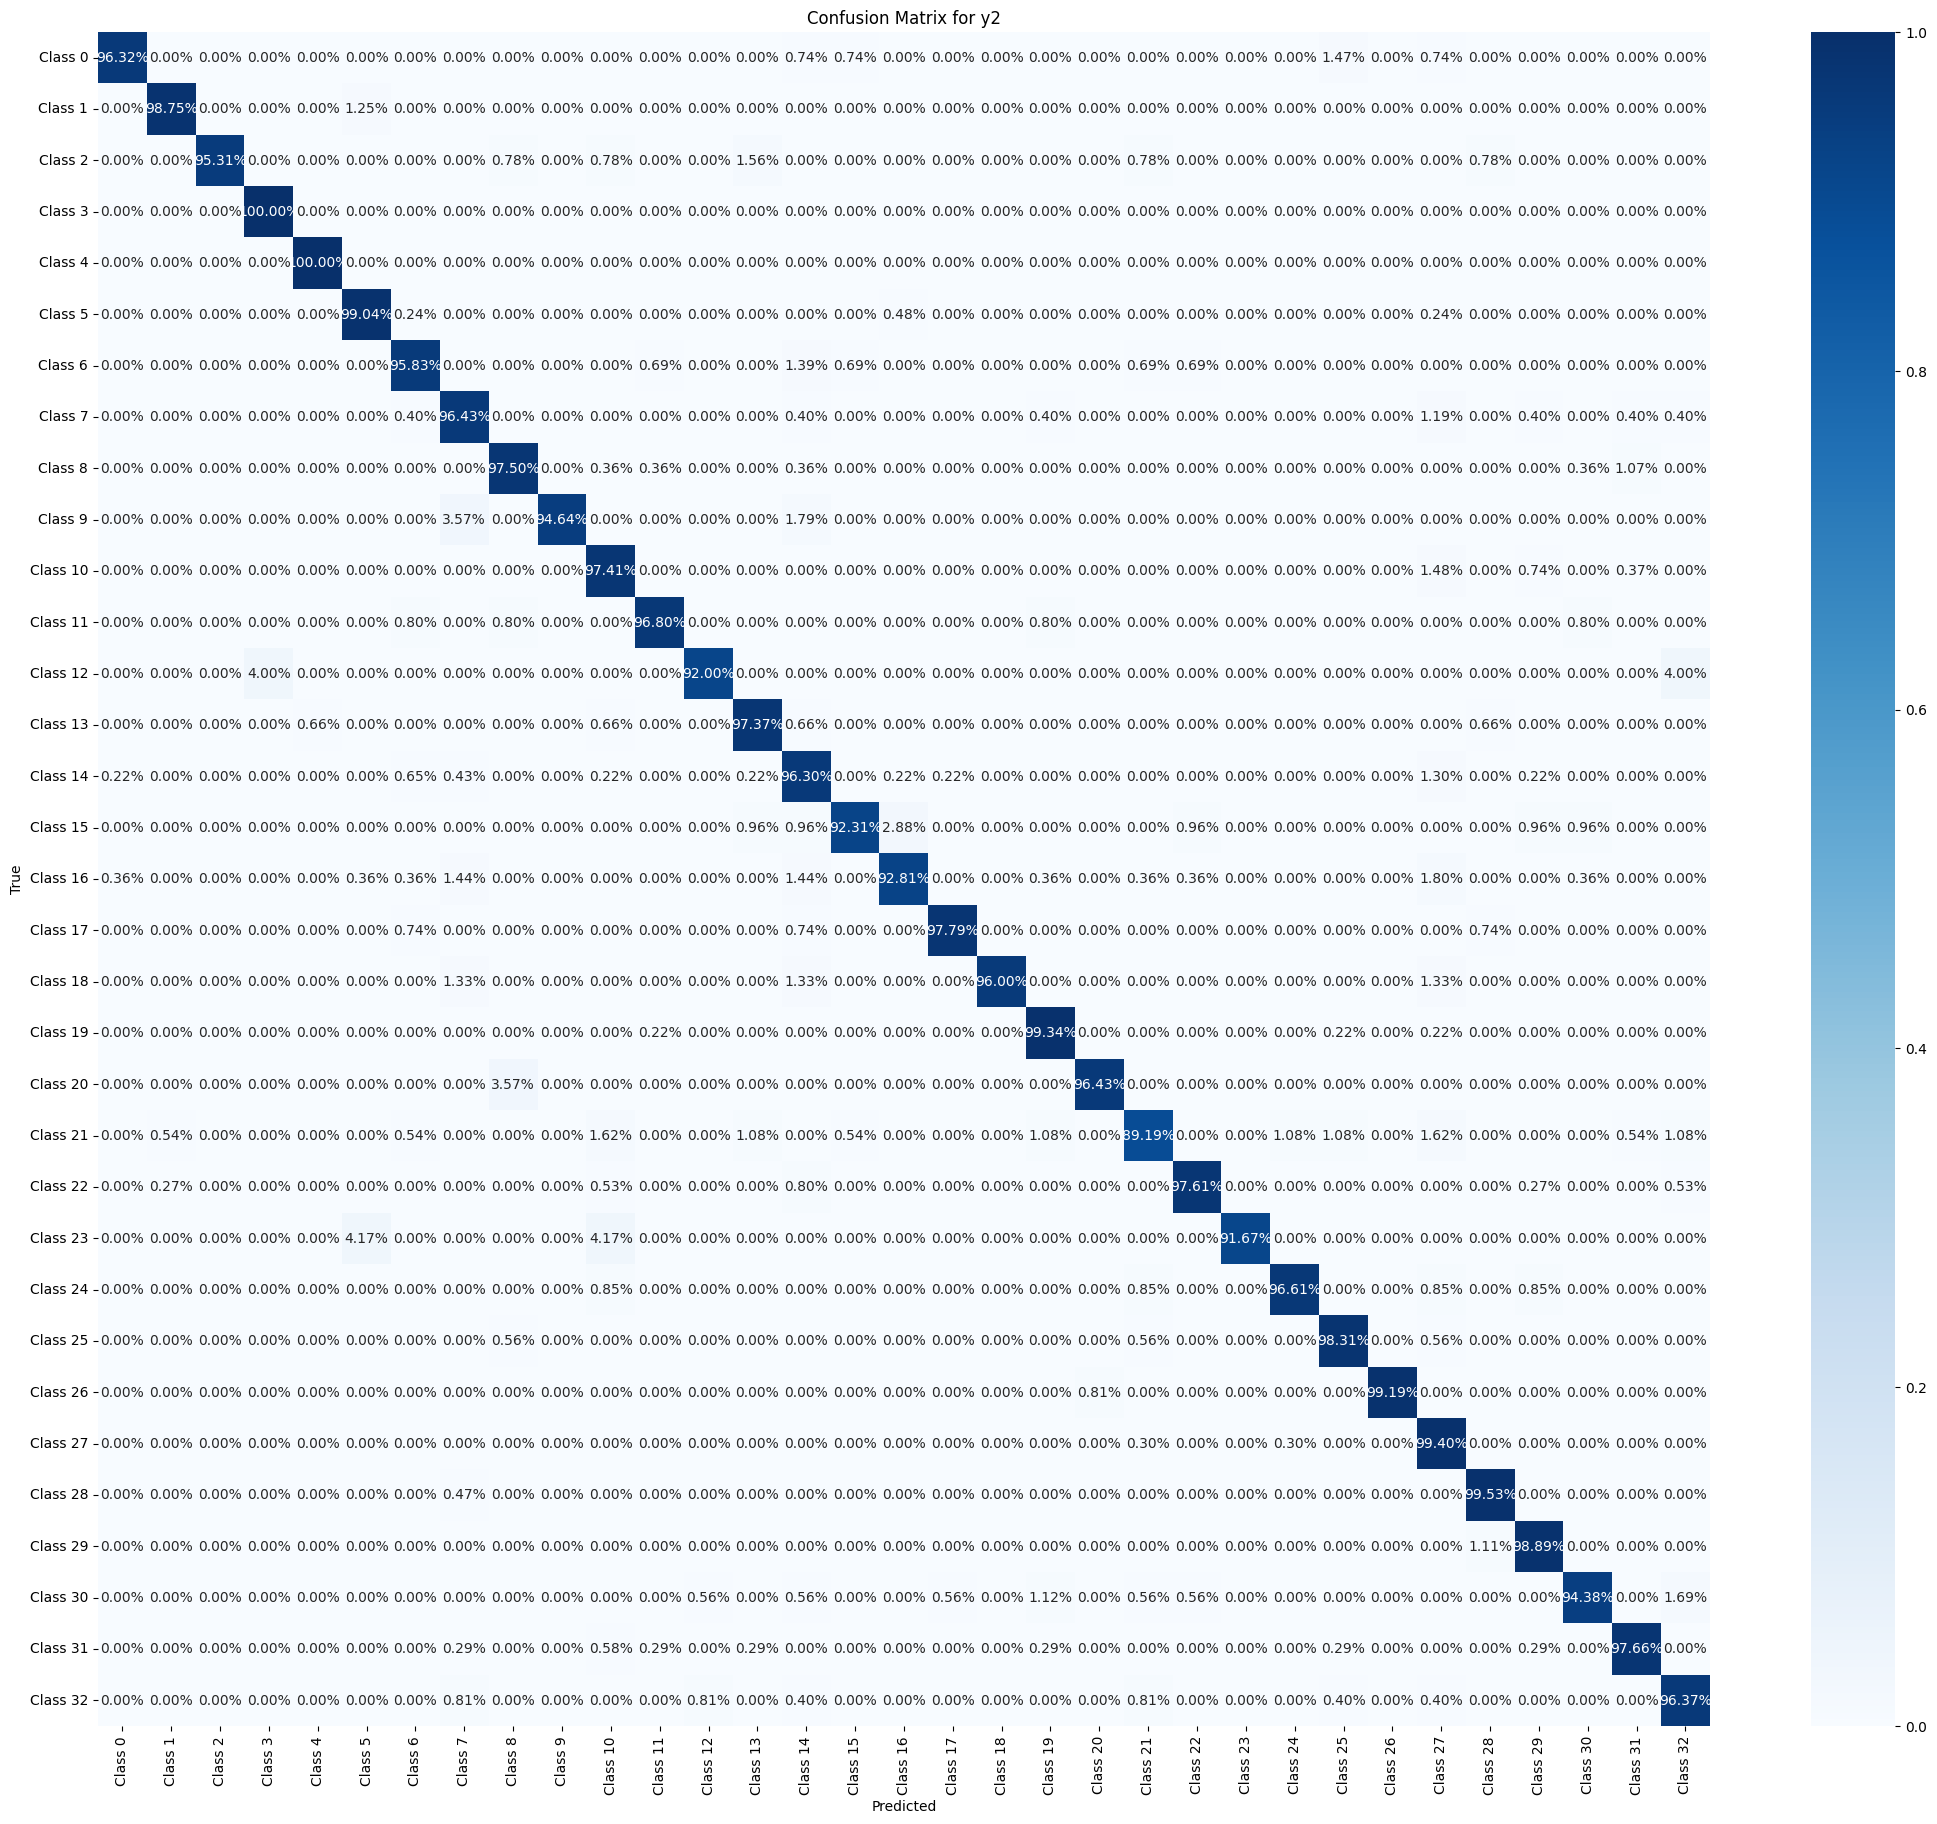

In [61]:
# Plot confusion matrix for y2 with larger figure size
plt.figure(figsize=(26, 22))
sns.heatmap(conf_matrix_y2 / conf_matrix_y2.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues", xticklabels=[f"Class {i}" for i in range(y2_pred.shape[1])], yticklabels=[f"Class {i}" for i in range(y2_pred.shape[1])])
plt.title("Confusion Matrix for y2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()